<a href="https://colab.research.google.com/github/Wee7/FinancialEngineering_IR_xVA/blob/main/homework%20(Python)/QM/Ex1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# data = np.loadtxt("ex1data1.txt", delimiter=',')
!shopt -s extglob
!wget "https://github.com/qinhanmin2014/machine-learning-Andrew-Ng/blob/168916388b2af4b872099398864544a39c69f5b7/homework%20(Python)/ex1/ex1data1.txt"

--2021-11-11 13:58:23--  https://github.com/qinhanmin2014/machine-learning-Andrew-Ng/blob/168916388b2af4b872099398864544a39c69f5b7/homework%20(Python)/ex1/ex1data1.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ex1data1.txt.1’

ex1data1.txt.1          [ <=>                ] 159.28K  --.-KB/s    in 0.08s   

2021-11-11 13:58:24 (2.01 MB/s) - ‘ex1data1.txt.1’ saved [163107]



In [ ]:
!ls

ex1data1.txt  sample_data


In [ ]:
# with open("ex1data1.txt", "r") as file1:
#     FileContent = file1.read()
#     print(FileContent)

In [ ]:
ex1data1 = """
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.0259
6.0062,1.2784
7.2259,3.3411
5.0269,-2.6807
6.5479,0.29678
7.5386,3.8845
5.0365,5.7014
10.274,6.7526
5.1077,2.0576
5.7292,0.47953
5.1884,0.20421
6.3557,0.67861
9.7687,7.5435
6.5159,5.3436
8.5172,4.2415
9.1802,6.7981
6.002,0.92695
5.5204,0.152
5.0594,2.8214
5.7077,1.8451
7.6366,4.2959
5.8707,7.2029
5.3054,1.9869
8.2934,0.14454
13.394,9.0551
5.4369,0.61705
"""

# Linear Regression with One Variable

Predict profit for a food truck.

Data: profits and populations from the cities.

In [ ]:
ex1data1_float_list = [[float(j[0]), float(j[1])] for j in [i.split(",") for i in ex1data1.split("\n")][1:-1]]

In [ ]:
data = np.array(ex1data1_float_list)
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [98]:
X = data[:, 0][:, np.newaxis]   # --> why? -> For later np.ones appending
y = data[:, 1]
m = len(y)   # number of training examples

print(X.shape, y.shape, m)

(97, 1) (97,) 97


## 2.1 Plotting the Data

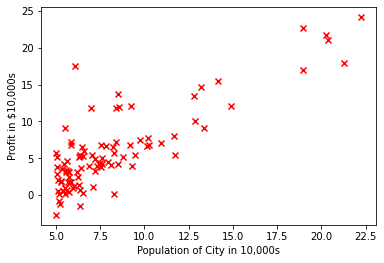

In [93]:
plt.figure()
plt.scatter(X[:, 0], y, marker='x', c='r')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

## 2.2 Gradient Descent

### 2.2.1 Update Equations

Objective Function: minimize $J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$

where $ h_\theta(x^{(i)}) = \theta^T x = \theta_0 + \theta_1 x^{(i)}_1$

Batch Gradient Descent update: $\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$ for $j=1, 2$

$\theta_0 = \theta_0 - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)$

$\theta_1 = \theta_1 - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}$



### 2.2.2 Implementation

In [181]:
X_train = np.append(np.ones(m)[:, np.newaxis], X, axis=1)
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

print(X_train.shape, theta.shape)

(97, 2) (2, 1)


### 2.2.3 Computing the cost $J(\theta)$

In [160]:
def compute_cost(X, y, theta, m):
  h = np.dot(X_train, theta)
  J = 1 / (2*m) * np.sum((h[:, 0] - y)**2)
  return J

In [161]:
compute_cost(X_train, y, theta, m)

32.072733877455676

### 2.2.4 Gradient Descent

In [177]:
def gradient_descent(X_train, y, theta, alpha, m):
  h = np.dot(X_train, theta)
  theta_0 = theta[0] - alpha * 1 / m * np.sum((h[:, 0] - y))
  theta_1 = theta[1] - alpha * 1 / m * np.dot((h[:, 0] - y).T, X_train[:, 1])  # same as np.sum((h[:, 0] - y) * X_train[:, 1])
  theta = np.array((theta_0, theta_1))
  J = compute_cost(X_train, y, theta, m)
  return theta, J

In [182]:
J_all = []
for i in range(iterations):
  theta, J = gradient_descent(X_train, y, theta, alpha, m)
  J_all.append(J)
  

**Comment**: Comparing with the answer: 1. theta could be updated parallel 2. iteration should be inside gradient_descent()


```
# This is formatted as code

def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0])
                 * np.dot(X.T, (np.dot(X, theta) - y)))   
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history
```



In [190]:
print("theta: ", theta, "\n J_all in the end: ", J_all[-20:])

theta:  [[-3.63029144]
 [ 1.16636235]] 
 J_all in the end:  [4.483843632870647, 4.483818879397901, 4.4837942150857355, 4.483769639613, 4.483745152659696, 4.483720753906987, 4.483696443037178, 4.483672219733719, 4.483648083681199, 4.483624034565349, 4.483600072073026, 4.483576195892218, 4.483552405712033, 4.483528701222707, 4.483505082115583, 4.48348154808312, 4.483458098818883, 4.483434734017543, 4.483411453374869, 4.483388256587725]


In [195]:
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)
print(predict1, predict2)

[0.45197679] [4.53424501]


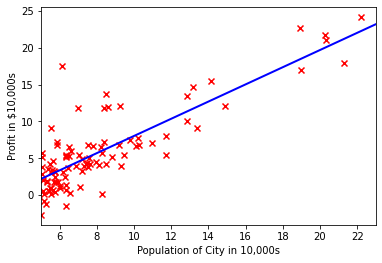

In [197]:
plt.figure()
plt.scatter(X[:, 0], y, marker='x', c='r')
X_plot = np.linspace(5, 23, 100)
plt.plot(X_plot, theta[0] + X_plot * theta[1],
         color="b", linewidth=2)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.xlim(5, 23)
plt.show()

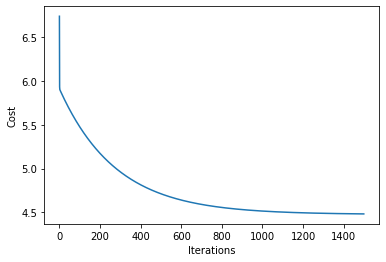

In [199]:
plt.figure()
plt.plot(np.arange(iterations), J_all)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()